## Kaggle competition nlp-getting-started: Classifying disasters


In [5]:
import os
os.chdir('nlp-getting-started')

In [6]:
os.getcwd()

'C:\\Users\\Ramello\\Documents\\GitHub\\kaggle-competitions\\nlp-getting-started'

In [10]:
from zipfile import ZipFile
file_name = "nlp-getting-started.zip"
with ZipFile(file_name, 'r') as z:
    z.printdir()
    z.extractall()

File Name                                             Modified             Size
sample_submission.csv                          2019-12-16 20:36:22        22746
test.csv                                       2019-12-16 20:36:22       420783
train.csv                                      2019-12-16 20:36:22       987712


In [7]:
import numpy as np
import pandas as pd

nlp_df = pd.read_csv('train.csv')

In [8]:
nlp_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Columns
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

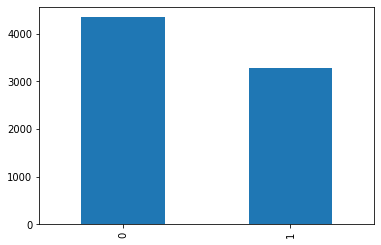

In [66]:
nlp_df.target.value_counts().plot(kind='bar')

In [14]:
nlp_df[nlp_df.target==0].head(10)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
20,31,NaN,NaN,this is ridiculous....,0
21,32,NaN,NaN,London is cool ;),0
22,33,NaN,NaN,Love skiing,0
23,34,NaN,NaN,What a wonderful day!,0
24,36,NaN,NaN,LOOOOOOL,0


In [35]:
nlp_df.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [36]:
pos_df = nlp_df[nlp_df.target==1]

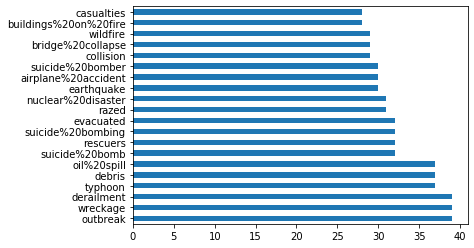

In [63]:
pos_df.keyword.value_counts()[:20].plot(kind='barh');

In [67]:
nlp_df.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [68]:
nlp_df.location.value_counts()

USA                          104
New York                      71
United States                 50
London                        45
Canada                        29
                            ... 
Hamburg, DE                    1
 Somewhere.                    1
Nadiad ,Gujarat , India!!      1
Xi'an, China                   1
iamdigitalent.com              1
Name: location, Length: 3341, dtype: int64

## NLP with spaCy

In [31]:
import spacy
from spacy import displacy
#!python -m spacy download en_core_web_sm

In [10]:
nlp = spacy.load('en_core_web_sm')

In [26]:
def find_disaster(doc):
    return 'disaster' in doc
g = [text for text in nlp_df.text.values.tolist() if find_disaster(text)]
g[:15]
#disaster does not necessarily indicate natural disaster

['#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 'Volunteers needed to participate in Emergency Preparedness drill simulating a bioterrorism disaster: http://t.co/NWV2RvGHf3 @HVnewsnetwork',
 "Australia's Ashes disaster - how the collapse unfolded at Trent Bridge... http://t.co/Dq3ddGvgBF\n #cricket",
 "Australia's Ashes disaster - how the collapse unfolded at Trent Bridge - Telegraph http://t.co/6FYnerMUsG",
 'Emergency responders prepare for chemical disaster through Hazmat training. http://t.co/q9zixCi8E6',
 '(#LosDelSonido) Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Ma...  (#IvanBerroa)',
 'Obama declares disaster for typhoon-devastated Saipan: President Barack Obama has declared the Commonwealth of... http://t.co/4k8OLZv9bV',
 'Obama declares disaster for typhoon-devastated Saipan #Worldnews http://t.co/9NYXjndoRA',
 'Obama Declares Disaster for Typhoon-Devastated Saipan: 

In [30]:
doc = nlp(g[0])
displacy.render(doc)

In [32]:
doc = nlp(g[1])
displacy.render(doc)